In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['RELIANCE.NS', 'TCS.NS', 'SBIN.NS', 'HINDUNILVR.NS']

In [3]:
# start time and end time
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [4]:
# Data Scraping from yahoo finance 

Reliance = pdr.get_data_yahoo('RELIANCE.NS', start, end=datetime.now())
TCS = pdr.get_data_yahoo('TCS.NS', start, end=datetime.now())
SBI = pdr.get_data_yahoo('SBIN.NS', start, end=datetime.now())
HindUniLVR = pdr.get_data_yahoo('HINDUNILVR.NS', start, end=datetime.now())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
company_list = [Reliance, TCS, SBI, HindUniLVR]
company_name = ["Reliance", "TCS", "SBI", "HINDUNILVR"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-25,2589.000000,2624.899902,2582.100098,2617.600098,2608.386230,3391988,Reliance
2022-11-28,2608.899902,2721.050049,2502.000000,2707.550049,2698.019531,14549929,Reliance
2022-11-29,2703.949951,2731.649902,2694.000000,2712.199951,2702.653076,5103687,Reliance
2022-11-30,2712.500000,2745.449951,2698.199951,2731.350098,2721.735596,12075137,Reliance
2022-12-01,2741.800049,2755.000000,2716.000000,2723.300049,2713.714111,4377696,Reliance
...,...,...,...,...,...,...,...
2023-11-20,2534.449951,2534.500000,2500.000000,2506.449951,2506.449951,944231,HINDUNILVR
2023-11-21,2505.000000,2517.000000,2498.000000,2505.250000,2505.250000,1088806,HINDUNILVR
2023-11-22,2507.750000,2524.250000,2504.000000,2521.899902,2521.899902,816610,HINDUNILVR


In [6]:
Reliance.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,2450.402818,2467.873780,2429.614725,2448.085487,2441.686815,6.210313e+06
std,124.429118,127.626176,123.261005,126.828222,125.061381,3.244507e+06
min,2215.000000,2220.000000,2180.000000,2201.250000,2193.501465,0.000000e+00
25%,2348.887512,2360.924988,2328.612427,2345.800049,2343.378357,4.105465e+06
50%,2445.449951,2462.000000,2427.074951,2440.650024,2433.254639,5.327252e+06
75%,2528.224976,2548.825012,2509.412537,2525.437439,2519.064087,7.201708e+06
max,2830.000000,2856.000000,2797.000000,2841.850098,2831.846680,2.854094e+07


In [7]:
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-11-25 to 2023-11-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          248 non-null    float64
 1   High          248 non-null    float64
 2   Low           248 non-null    float64
 3   Close         248 non-null    float64
 4   Adj Close     248 non-null    float64
 5   Volume        248 non-null    int64  
 6   company_name  248 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.5+ KB


## Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

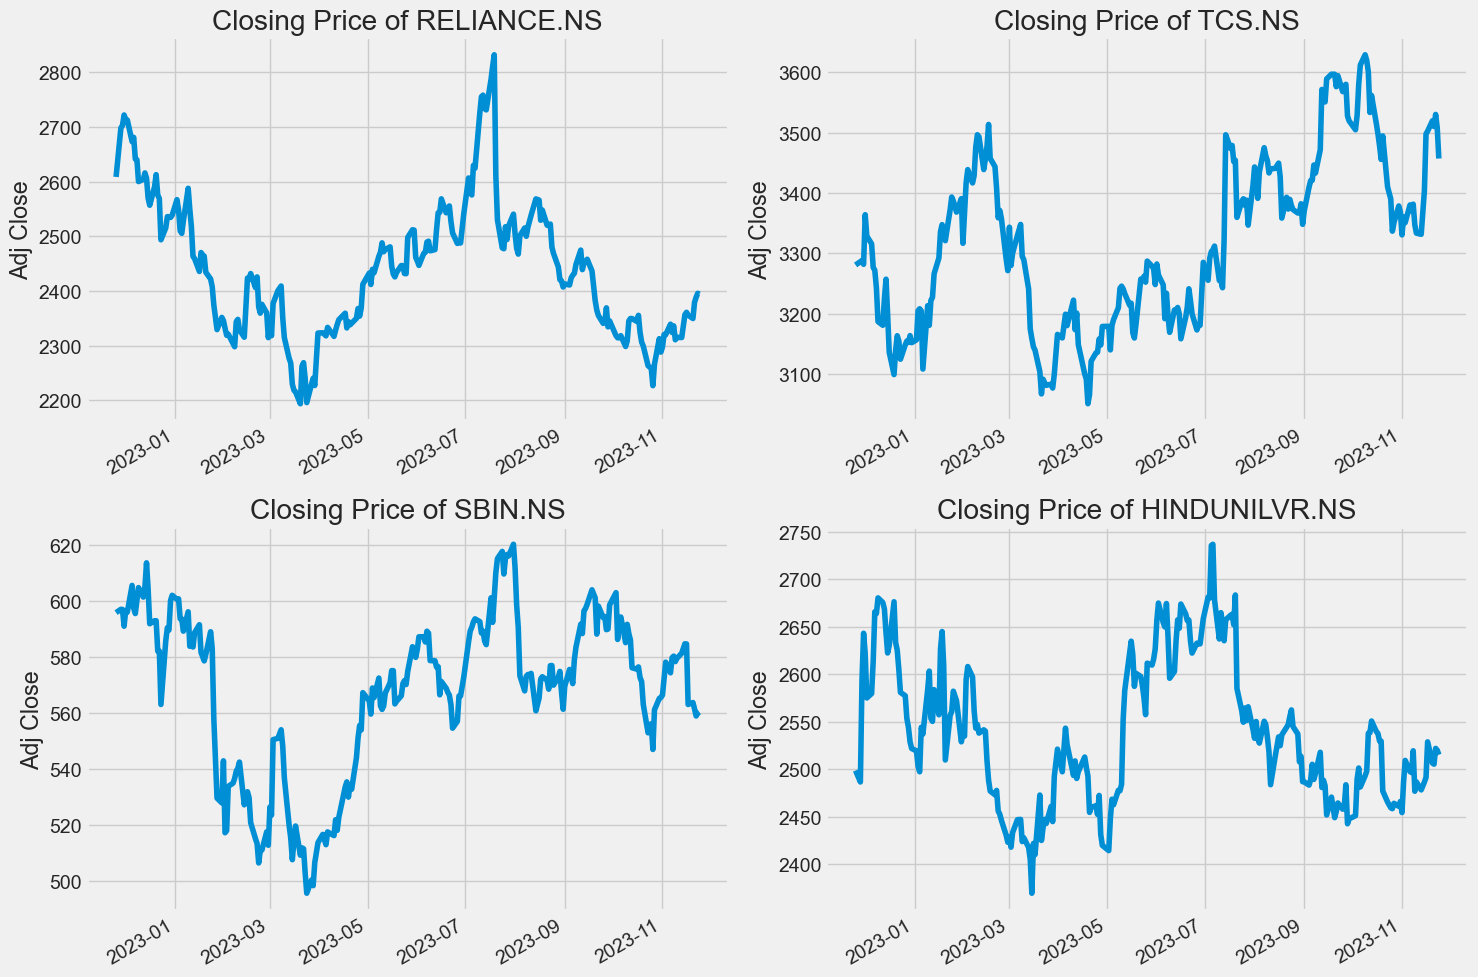

In [8]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

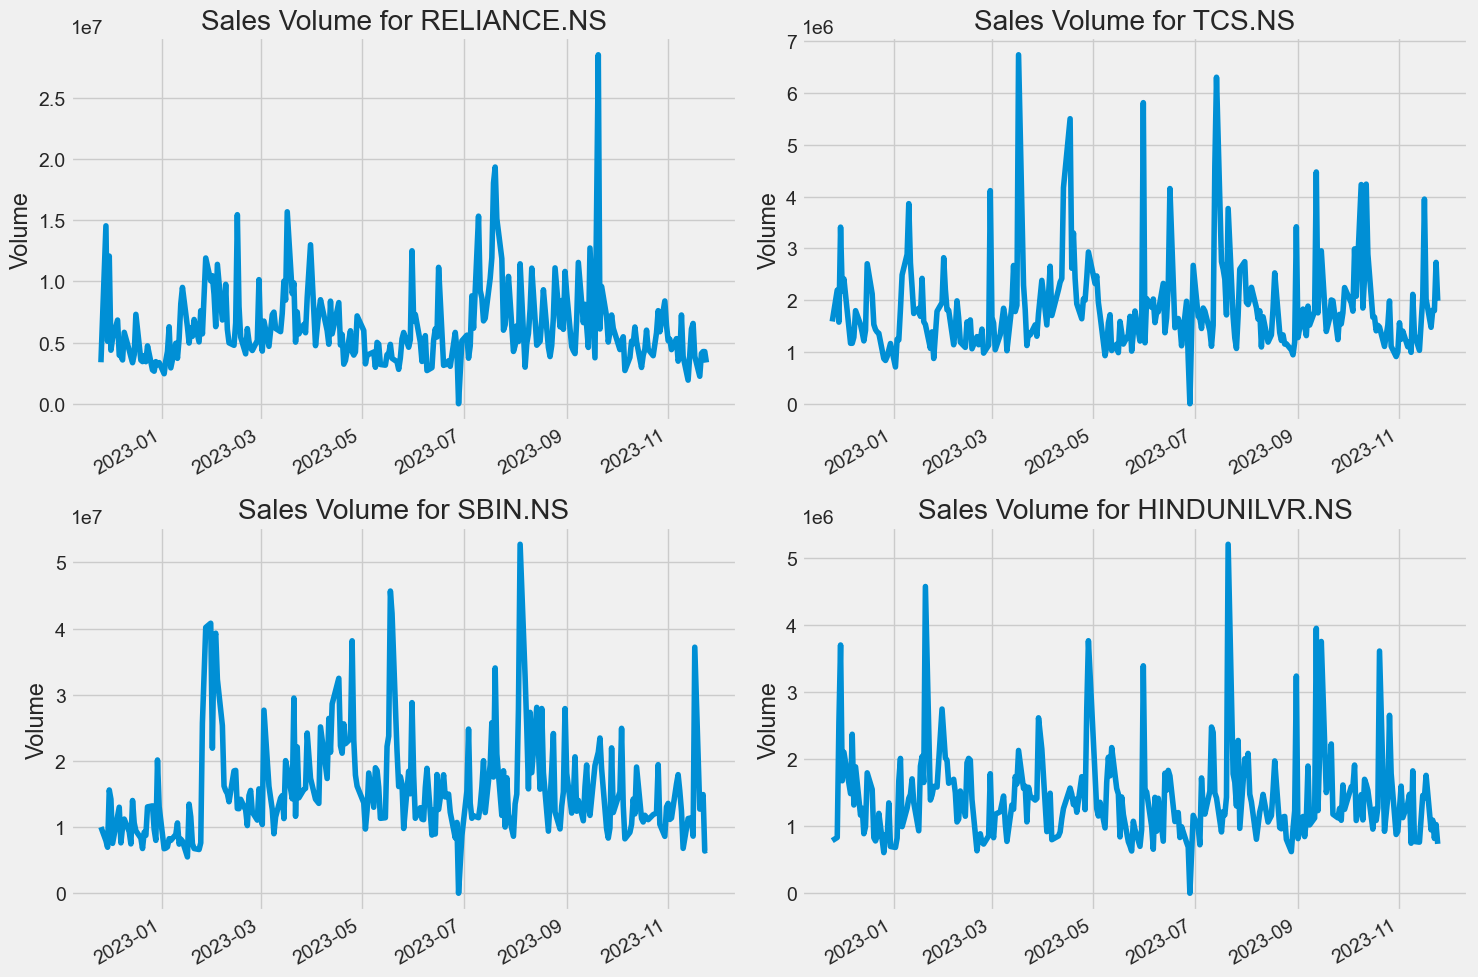

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

## Moving average of the  stocks
The average is taken over a specific period of time, like 10 days, 20 days, 30 days, or any time period the trader chooses.

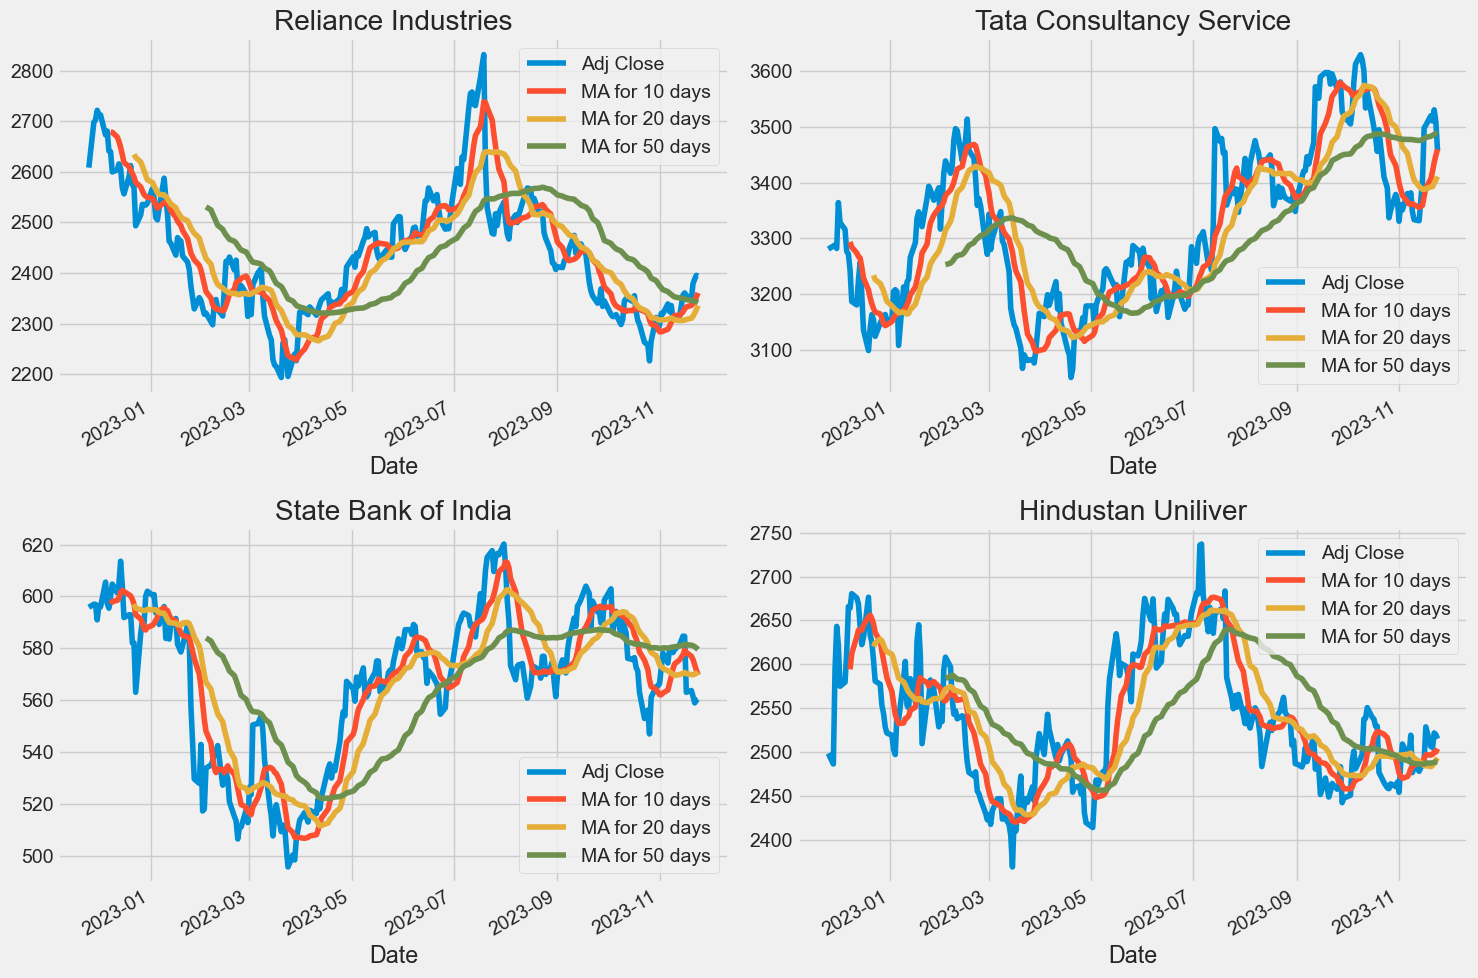

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

Reliance[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Reliance Industries')

TCS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Tata Consultancy Service')

SBI[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('State Bank of India')

HindUniLVR[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Hindustan Uniliver')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise

## Daily Return 

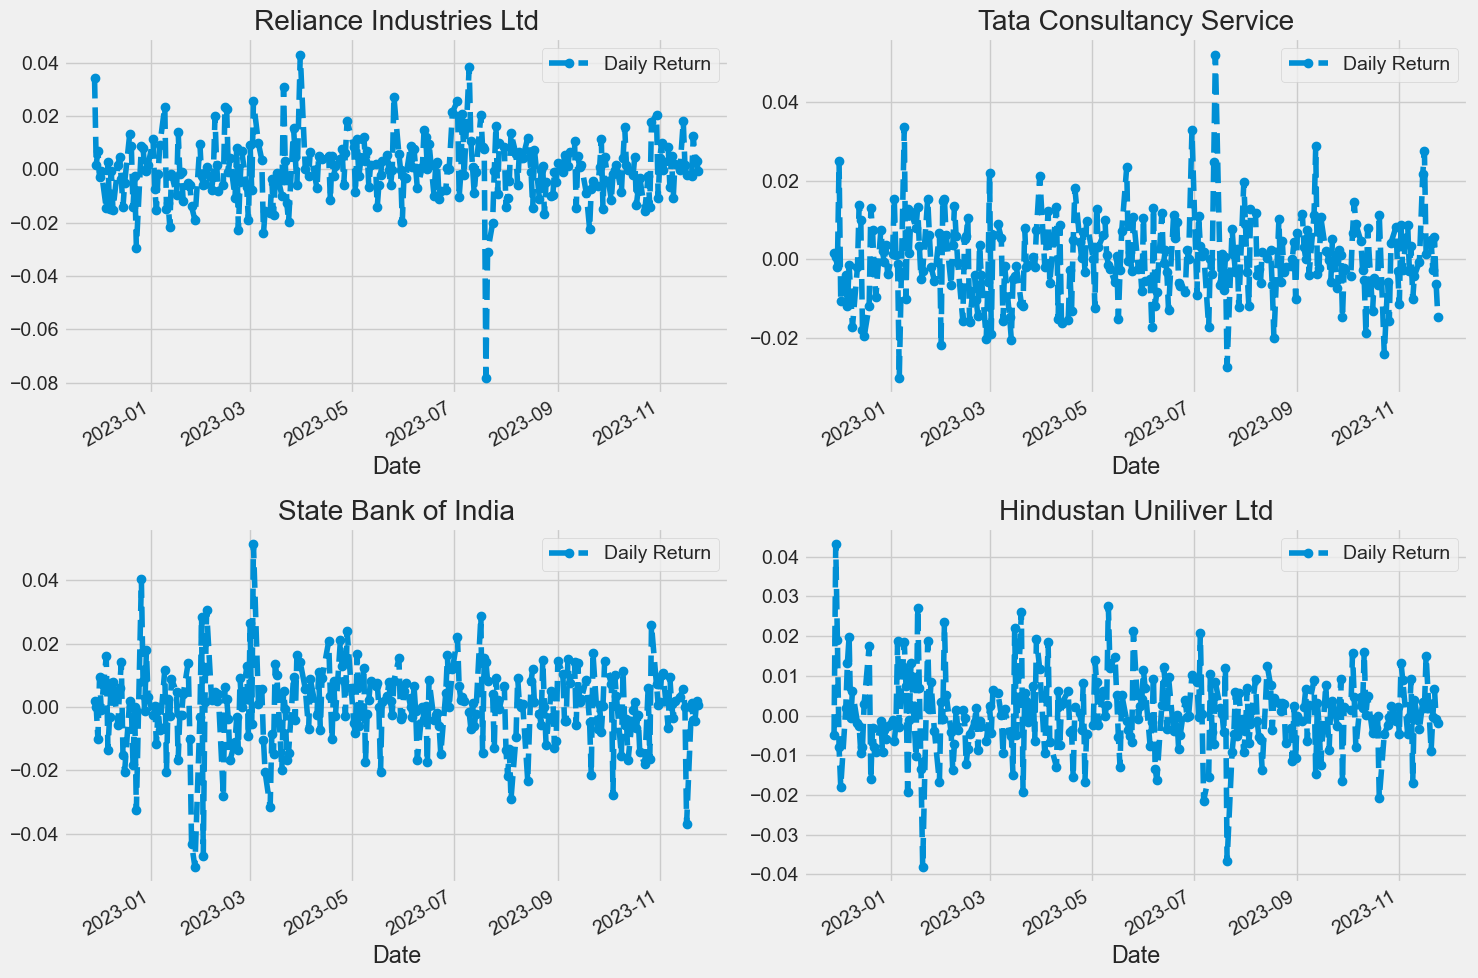

In [11]:
# Use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

Reliance['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Reliance Industries Ltd')

TCS['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Tata Consultancy Service')

SBI['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('State Bank of India')

HindUniLVR['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Hindustan Uniliver Ltd')

fig.tight_layout()

 Average daily return using a histogram. Use seaborn to create both a histogram and kde plot on the same figure.

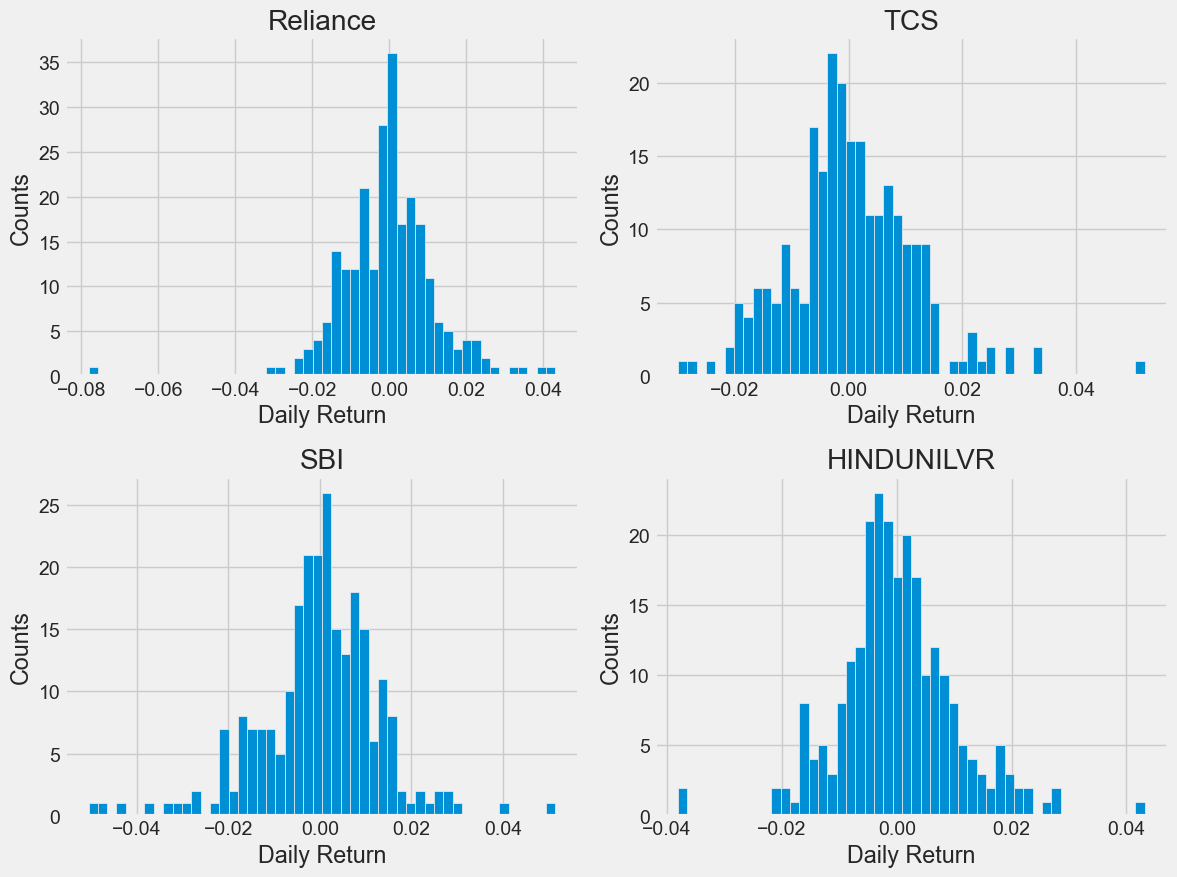

In [12]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## Correlation between  stocks closing prices

In [13]:
# All the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,HINDUNILVR.NS,RELIANCE.NS,SBIN.NS,TCS.NS
Date,,,,
2022-11-25,NaN,NaN,NaN,NaN
2022-11-28,-0.004828,0.034364,0.001976,0.001652
2022-11-29,0.043165,0.001717,-0.000082,0.000618
2022-11-30,0.019038,0.007061,-0.010024,-0.001928
2022-12-01,-0.008009,-0.002947,0.009378,0.025024


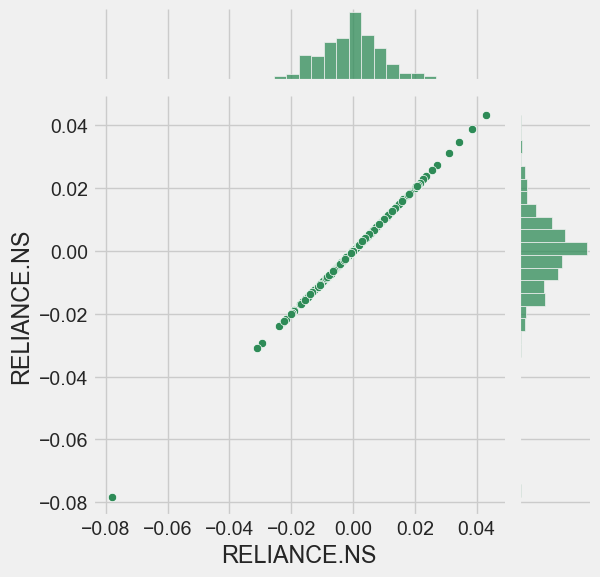

In [14]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='RELIANCE.NS', y='RELIANCE.NS', data=tech_rets, kind='scatter', color='seagreen')

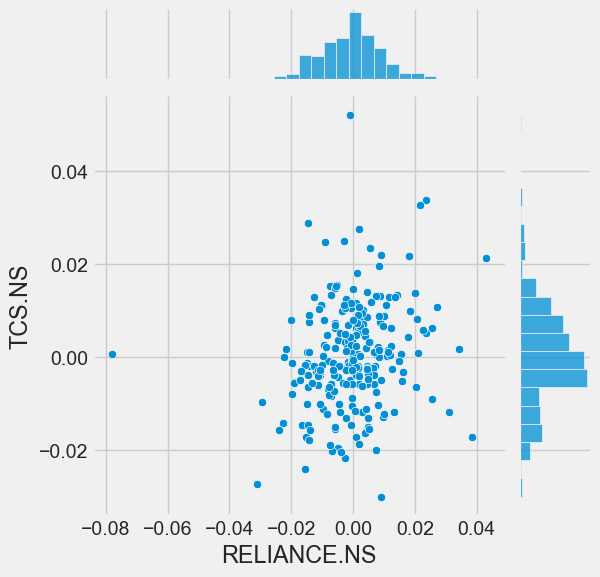

In [15]:
# Now use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='RELIANCE.NS', y='TCS.NS', data=tech_rets, kind='scatter')

-->So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. \
-->Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. \
Use **sns.pairplot()** to automatically create this plot

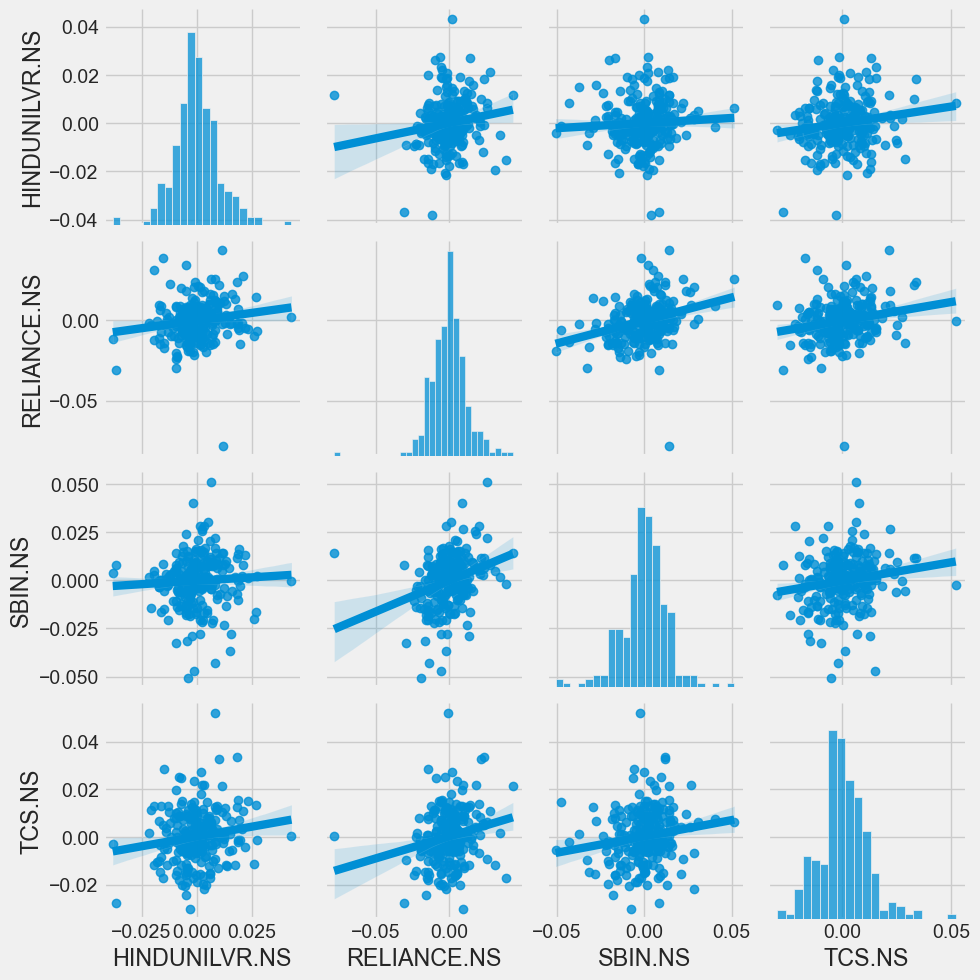

In [16]:
# Call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. \
\
While calling **sns.pairplot()** , we can also use **sns.PairGrid()** for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.

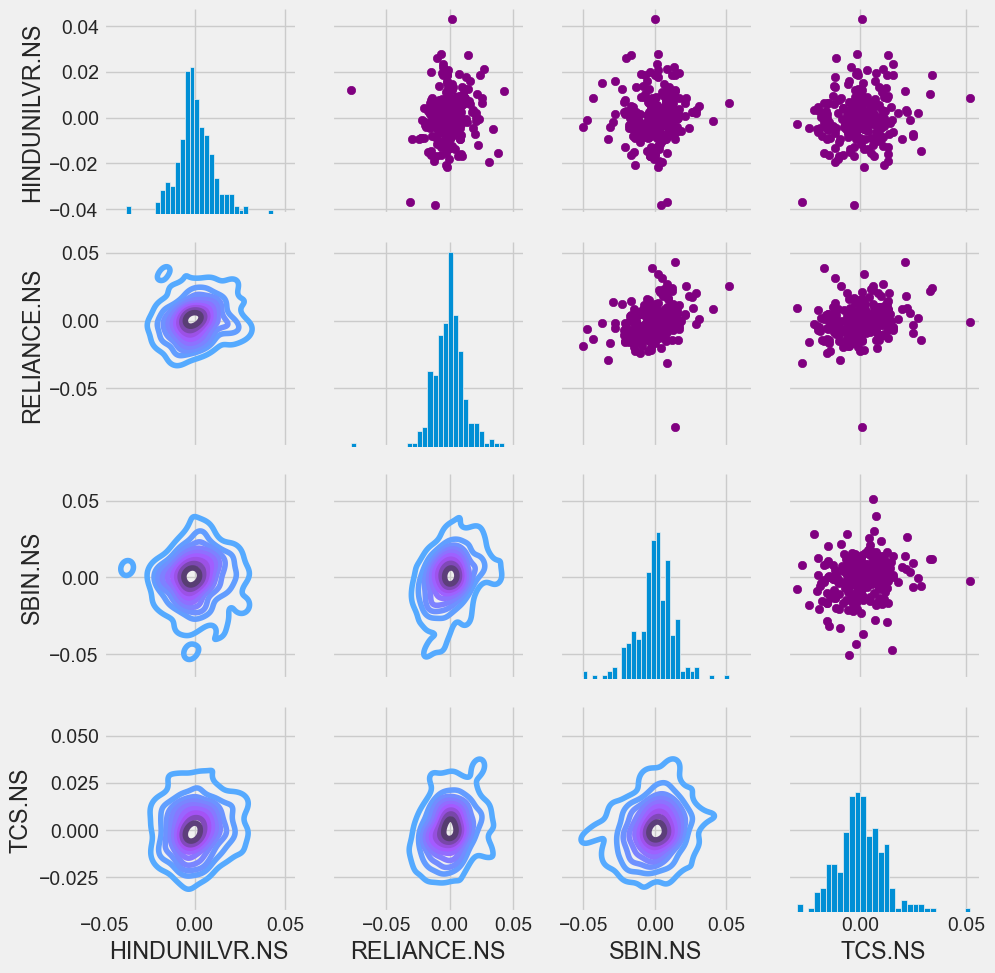

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

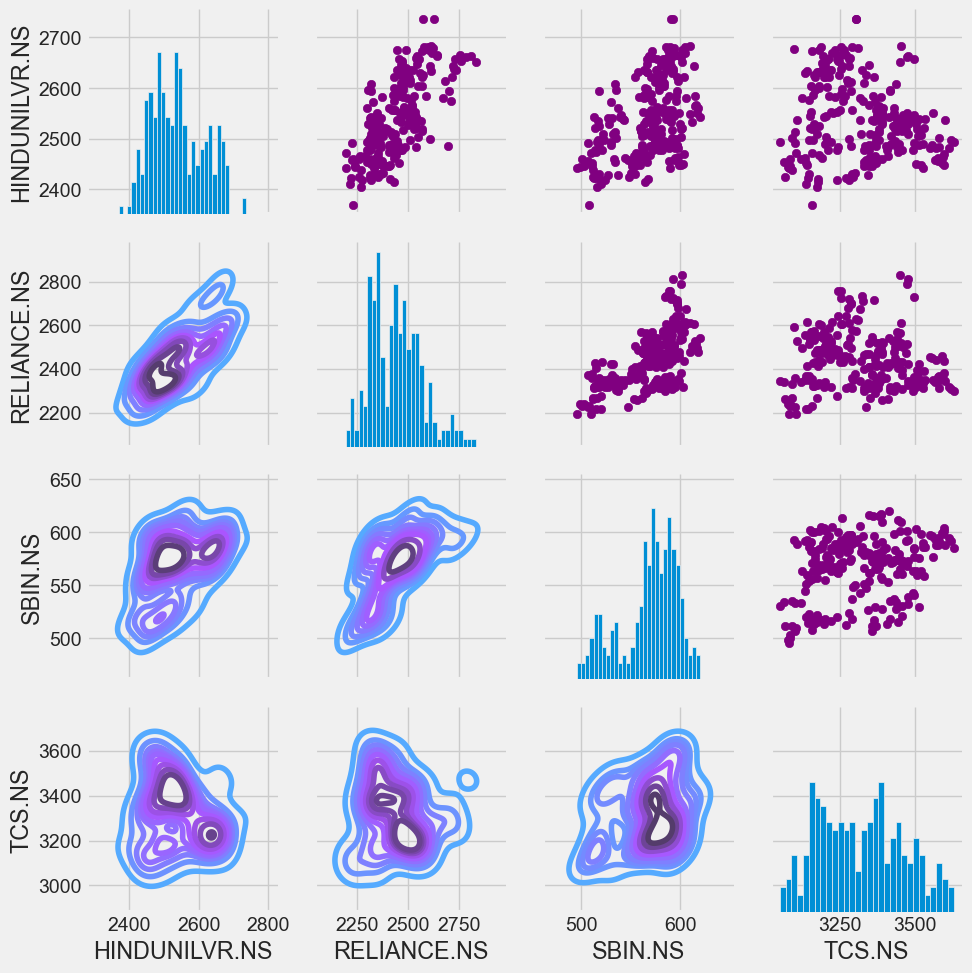

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

Text(0.5, 1.0, 'Correlation of stock closing price')

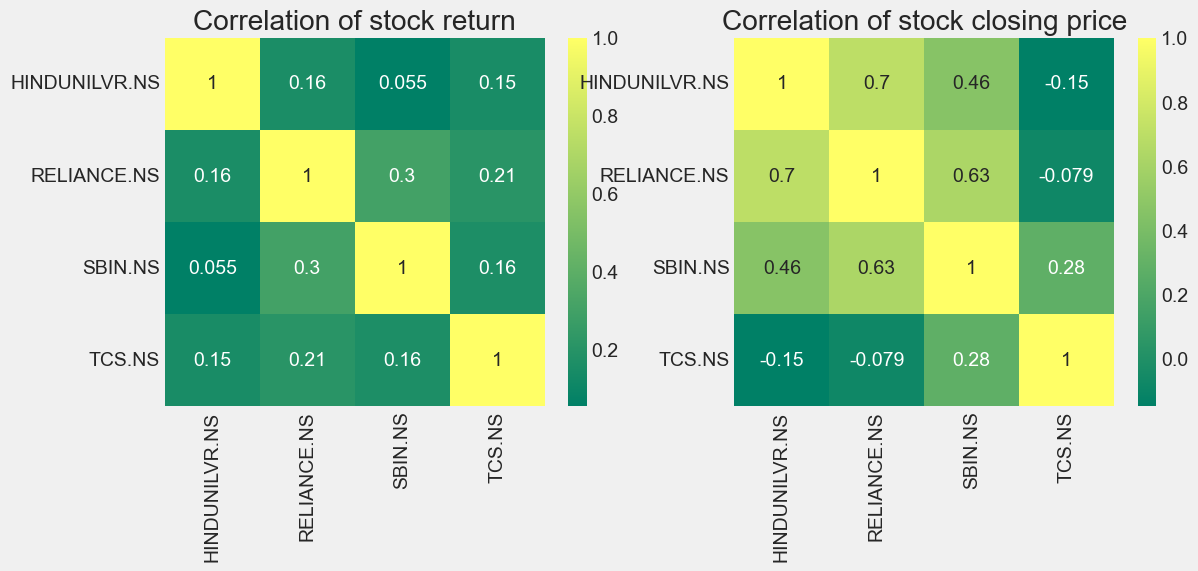

In [19]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

We see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return.

## Risk Analysis
Using daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

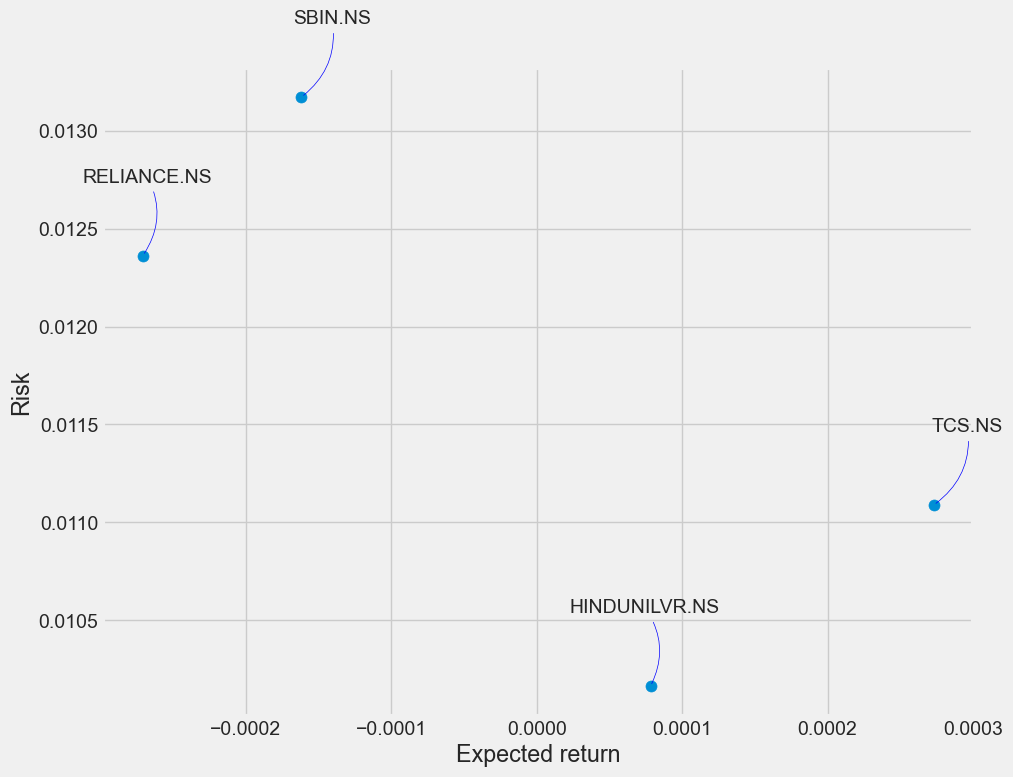

In [20]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the Closing Price of stocks

In [21]:
# Get the stock quote
df = pdr.get_data_yahoo('TCS.NS', start='2018-11-24', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-26,1819.000000,1860.000000,1784.500000,1846.099976,1656.339722,4333177
2018-11-27,1854.000000,1897.900024,1835.349976,1890.250000,1695.951416,3344839
2018-11-28,1889.000000,1989.000000,1882.500000,1983.900024,1779.975220,5313249
2018-11-29,1997.000000,1997.000000,1942.550049,1960.550049,1759.025513,4035441
2018-11-30,1966.000000,1991.000000,1959.849976,1968.250000,1765.933960,5268901
...,...,...,...,...,...,...
2023-11-20,3491.250000,3533.899902,3491.250000,3519.600098,3519.600098,1475621
2023-11-21,3519.600098,3539.050049,3501.000000,3510.199951,3510.199951,1807236
2023-11-22,3500.000000,3532.649902,3481.100098,3530.149902,3530.149902,1798051


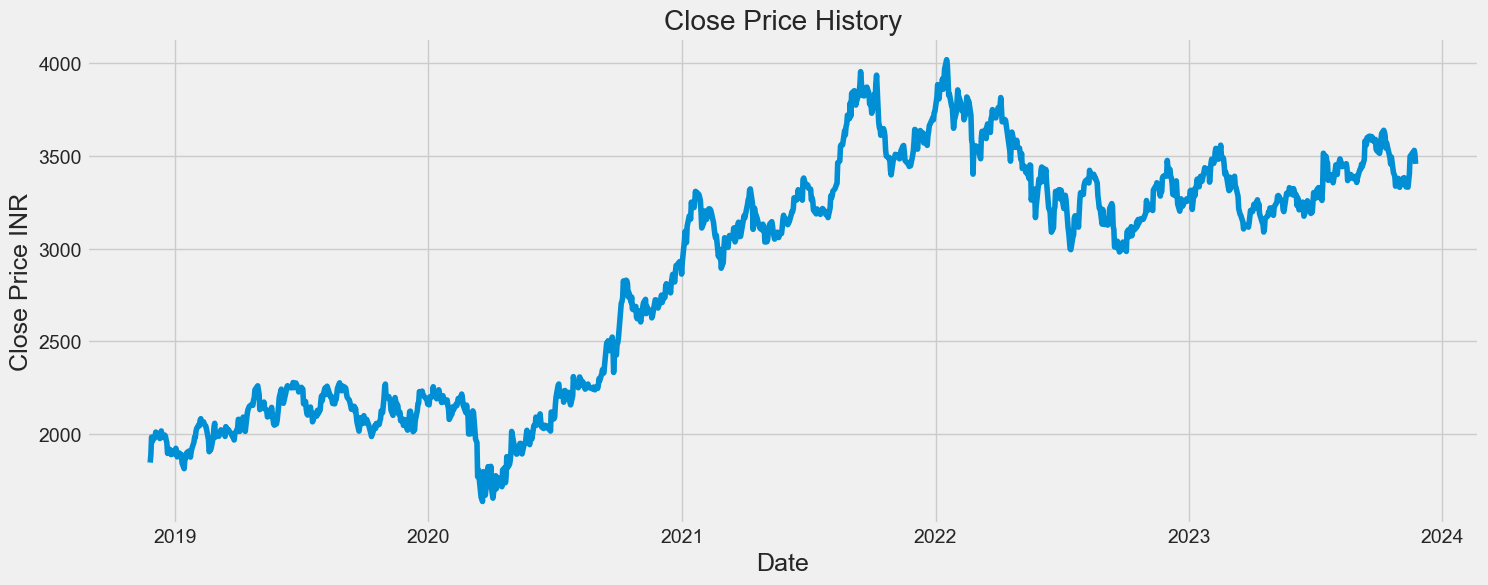

In [22]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [23]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .85 ))

training_data_len

1052

In [24]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08802669],
       [0.10655533],
       [0.14585784],
       ...,
       [0.79477924],
       [0.78558842],
       [0.76412212]])

In [25]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.08802669, 0.10655533, 0.14585784, 0.13605845, 0.13928993,
       0.14522833, 0.15716804, 0.15544739, 0.14955094, 0.15060013,
       0.14245849, 0.15261459, 0.15966514, 0.14531224, 0.14831292,
       0.15022246, 0.14751553, 0.13937384, 0.13333057, 0.10888454,
       0.11841113, 0.10611465, 0.11440322, 0.10898946, 0.10773044,
       0.11182226, 0.12042558, 0.11062615, 0.10093168, 0.10976585,
       0.10794027, 0.10517038, 0.1058419 , 0.08653688, 0.0742404 ,
       0.09713366, 0.09811988, 0.10825503, 0.11091995, 0.1142983 ,
       0.11144454, 0.10040709, 0.11129767, 0.1193764 , 0.13372924,
       0.1453752 , 0.14480865, 0.15853198, 0.16518381, 0.17370322,
       0.1713111 , 0.18400625, 0.18740555, 0.17838255, 0.18027108,
       0.17426982, 0.17133205, 0.16507889, 0.14015028, 0.11266161])]
[0.11683734806592472]

[array([0.08802669, 0.10655533, 0.14585784, 0.13605845, 0.13928993,
       0.14522833, 0.15716804, 0.15544739, 0.14955094, 0.15060013,
       0.14245849, 0.15261459, 0.15

In [26]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

from keras.src.engine.sequential import Sequential
from keras.src.engine.training import Model
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

992/992 [==============================] - 64s 56ms/step - loss: 0.0034


In [27]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 2s 51ms/step


84.18868632956908

C:\Users\asd\AppData\Local\Temp\ipykernel_4540\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


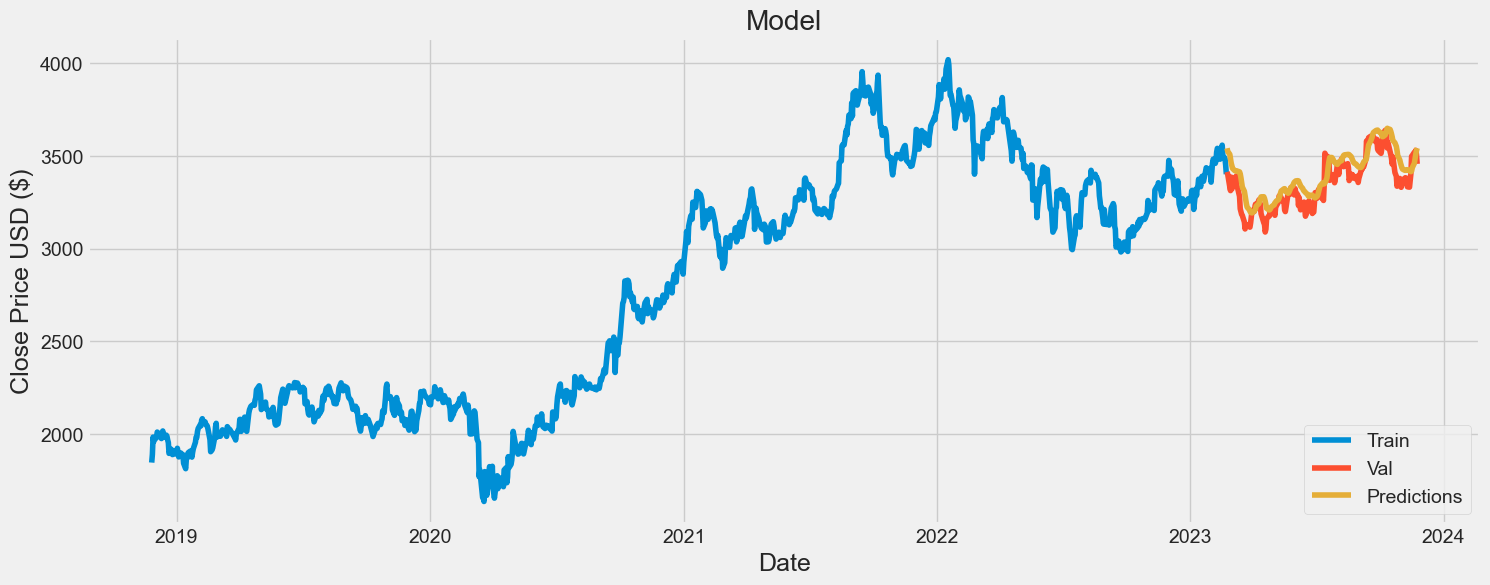

In [28]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [29]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-02-23,3413.800049,3541.436523
2023-02-24,3400.449951,3524.631104
2023-02-27,3331.850098,3508.147705
2023-02-28,3312.850098,3485.575928
2023-03-01,3385.699951,3460.808594
...,...,...
2023-11-20,3519.600098,3460.697510
2023-11-21,3510.199951,3486.372559
2023-11-22,3530.149902,3508.523193
